# Validation

### 1. Cross validation
### 2. Validaton on Test data
### 3. Confusion Matrix and Precision-Recall Curve

### Importing Librabries and Processed Data

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Loading Training Data
x_train = pd.read_csv('Data/x_train.csv');
y_train = pd.read_csv('Data/y_train.csv');

## 1. Cross Val Score

To Evaluate the bias and variance in our model we can use the cross val score method from sklearn to test our model on K-Folds, Doing so will give us a measure of variance in the model accuracy and as well as a measure of central tendency of the accuracy which will be a better approximation of the performance of the model on the training data

##Calculating 20 cv results for creating sample space

#### With Parameters obtained by GridSearchCV : Batch Size = 32, Epoch = 200, Optimizer = adam

In [ ]:
#Function to the build the architecture, same as before
def build_final_classifier():
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=11))
    classifier.add(Dropout(0.1))
    #Second Hidden Layer
    classifier.add(Dense(units=25, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(0.1))
    #Third Hidden Layer
    classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(0.1))
    #Output Layer
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
final_classifier = KerasClassifier(build_fn=build_final_classifier,epochs = 200, batch_size = 32) #Sklearn Wrapper
#Calculating cross val score
accuracies = cross_val_score(estimator=final_classifier, X = x_train, y = y_train, cv = 20)  

Streaming output truncated to the last 5000 lines.
Epoch 108/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8393
Epoch 109/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8397
Epoch 110/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8397
Epoch 111/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8397
Epoch 112/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8411
Epoch 113/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8380
Epoch 114/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8405
Epoch 115/200
238/238 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8380
Epoch 116/200
238/238 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.8415
Epoch 117/200
238/238 

In [ ]:
#Now let's look at the result from the cross val score and calculate the standard deviation and mean
print('\nThe Accuracies on 20 K-Folds:\n')

for a in accuracies:
  print('{:.4f}'.format(a))

print('\nThe Mean Accuracy: {:.4f}\n\nThe Standard Deviation of the sample: {:.4f}'.format(accuracies.mean(),accuracies.std()))
print('\nThe Variance of Accuracy: {:.7f}'.format(accuracies.var()))


The Accuracies on 20 K-Folds:

0.8575
0.8400
0.8575
0.8325
0.8275
0.8550
0.8825
0.8250
0.9000
0.8650
0.8625
0.8500
0.8425
0.8450
0.8300
0.8275
0.8600
0.8575
0.8371
0.8421

The Mean Accuracy: 0.8498

The Standard Deviation of the sample: 0.0187

The Variance of Accuracy: 0.0003492


## Bias and Variance analysis

The Mean Accuracy is about 85% which means we have a medium to low bias.  
The Standard Deviation is 0.0187 and accordingly we have a variance of 0.0003492 or about 0.0004 which reflects that our model shows a low variance as well.

![Bias-Variance](_images/Bias-Variance.png)  



The models shows good results on the training data and is a potential model for segmentation but we still have to check for performance on the test data

## 2. Validation on Test Data

In [ ]:
#Loading Test Data
x_test = pd.read_csv('Data/x_test.csv');
y_test = pd.read_csv('Data/y_test.csv');

#Training the model
Ann_Classifier = build_final_classifier()
Ann_Classifier.fit(x_train,y_train,epochs=200,batch_size=32); #This time i will train the model without using the wrapper

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7953
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7969
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8025
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8223
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8281
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8281
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8300
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8312
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8330
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4064 - accura

In [ ]:
#Accuracy on Training Data
acc_train = Ann_Classifier.evaluate(x_train,y_train,batch_size=32)[-1]
print('The Accuracy on the Training data: {:.2f}\n'.format(acc_train))
#Accuracy on Test Data
acc_test = Ann_Classifier.evaluate(x_test,y_test,batch_size=32)[-1]
print('The Accuracy on the Test data: {:.2f}'.format(acc_test))

250/250 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8740
The Accuracy on the Training data: 0.87

63/63 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8600
The Accuracy on the Test data: 0.86


## Results

The Accuracy reached on the Training data is: 87% and The Accuracy on the test data is: 86%  
The shows that there is no overfitting in the model on the train data since the accuracies on both the train set and the test set is comparable.  
This is because in our ANN architecture we have implemented a 'Dropout' Layer after every hidden layer that reduces overfitting.

## 3. Confusion Matrix and Precision Recall Curve


In [ ]:
#Extracting Probabilities on Test set
y_proba = Ann_Classifier.predict(x_test)

#Converting to Prediction with a Threshold of 0.6
y_pred = [1 if x > 0.6 else 0 for x in y_proba]
y_proba = np.array(y_proba1).reshape(-1,1) #Reshaping the prediction to match the shape of y_test

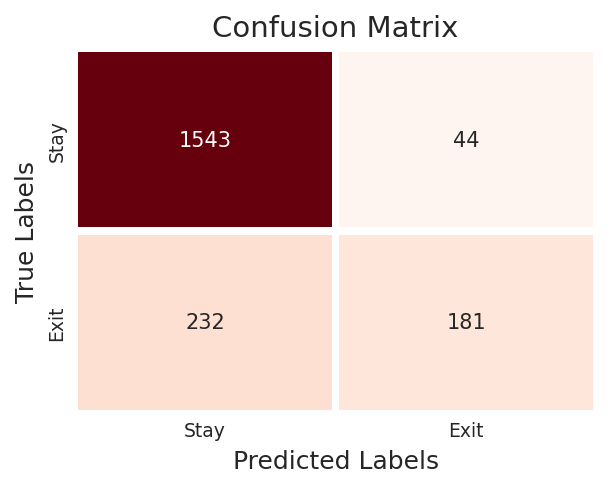

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#plotting Confusion Matrix
cf_mt = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (4,3),dpi=150)
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_mt, cmap="Reds", annot=True,annot_kws={"size": 10},fmt='g',linewidths=3,cbar=False)
plt.title('Confusion Matrix',fontdict={'size':14})
plt.xlabel('Predicted Labels',size=12)
plt.ylabel('True Labels',size=12)
plt.tick_params(labelsize = 9,length=0.5)
plt.xticks([0.5,1.5],['Stay','Exit'])
plt.yticks([0.5,1.5],['Stay','Exit'])
plt.savefig('Visualizations/Confusion_Matrix.png',bbox_inches='tight',facecolor='white');

Everyting thing is good except that our model has quite a lot of False Negatives(232) which means that there are 232 such customers in the test set that were predicted to stay by our model but in actuality they exited.

Such high number of False Positive decrease the models 'Recall' or 'Senstivity', Lets calculate some other evaluation criteria so that we can better judge our model

We can calculate the ratio's(Criterias) by using the sklearn librabry but here i am manually calculating them as this is a nice practice by which i can remember both the mathematical relation and what the ratio signifies

In [ ]:
#Extracting data from confusion matrix
TP = cf_mt[1,1] #True Positive, Customer was predicted to Exit and indeed Exited
TN = cf_mt[0,0] #True Negative, Customer was predicted to Stay and indeed Stayed
FP = cf_mt[0,1] #False Positive, Customer was Predicted to Exit but Stayed
FN = cf_mt[1,0] #False Negative, Customer was Predicted to Stay but Exited

#Calculating the evaluation criterias
precision = TP / (TP + FP) #The precentage of correct Positive Predictions out of all Positive Predictions
recall = TP / (TP + FN) #The percentage of Positive cases that were correctly identified out of the total Positive cases
f1_score = 2 * ( (precision * recall) / (precision + recall) ) #Harmonic mean of precision and recall

print('The Precision(Positive Predictive value) of the Model: {:.4f}\n'.format(precision))
print('The Recall(True Positive rate) of the Model: {:.4f}\n'.format(recall))
print('The F1 Score of the Model: {:.4f}'.format(f1_score))

The Precision(Positive Predictive value) of the Model: 0.8044

The Recall(True Positive rate) of the Model: 0.4383

The F1 Score of the Model: 0.5674


### Discussion:
As, we can see even if the accuracy is high that does not mean that the model is perfect, the overall precision was nice at 80% but the recall or sensitivity that is the power of the model to find the Positive cases from the data is low at 43.8%.   
So, a note for future improvement can be to tweak the model so that the recall can be improved and this can be done by a number of ways but the most straightforward of them all is by simply replacing the scoring parameter of the grid search to F1 Score that will take into account both Precision as well as Recall.  


But here i will take another approch for this task, before we go and change the hyperparameter of the model, we can also try chaning the threshold at which the prediction are sorted to Positive or Negative.  
Right now this value is 0.6, therefore any probability output of the model(Since we have used the sigmoid function at the output layer) above 0.6 will be treated as a Positive prediction and anything less 0.6 will be a Negative Prediciton.  
By changing this threshold we can tweak the Precision Recall TradeOff

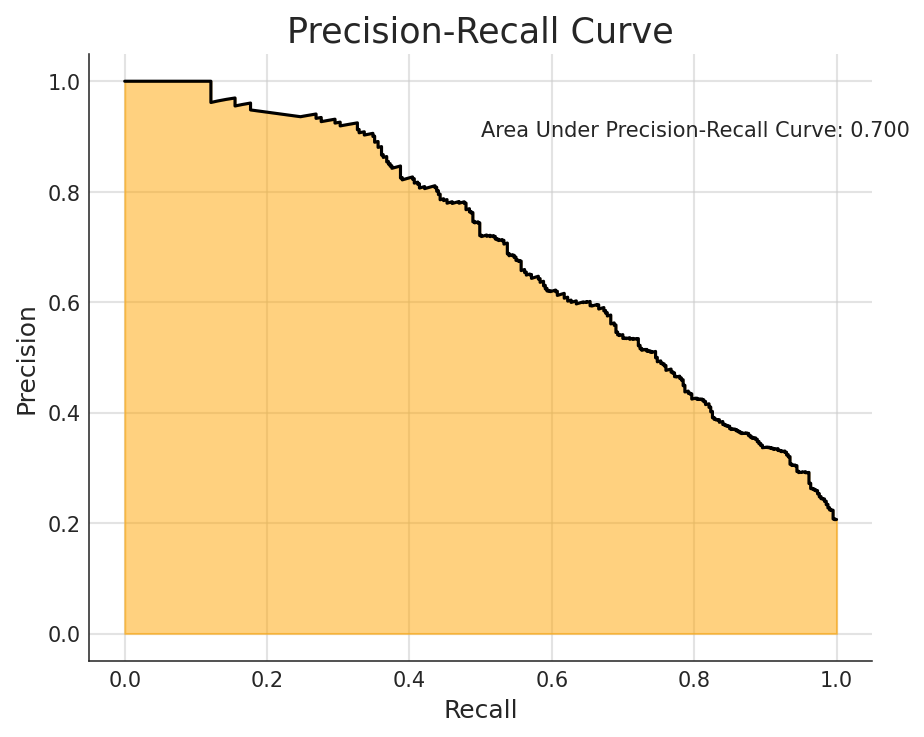

In [ ]:
#Lets look at the Precision Recall Curve
from sklearn.metrics import precision_recall_curve, auc

pr, rc, thr = precision_recall_curve(y_test,y_proba)

plt.figure(figsize = (6,5),dpi=150)
sns.set_style('white')
plt.plot(rc,pr,c='black')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall',size=12)
plt.ylabel('Precision',size=12)
plt.tick_params(labelsize=10,length=0.6)

sp = plt.gca().spines
for d in ['right','top']:
  sp[d].set_visible(False)
for d in ['left','bottom']:
  sp[d].set_linewidth(0.75)

plt.grid(alpha=0.55)
plt.fill_between(rc,pr,color='orange',alpha=0.5)
plt.text(0.5,0.9,s='Area Under Precision-Recall Curve: {:.3f}'.format(auc(rc,pr)),fontdict={'size':10})
plt.savefig('Visualizations/Precision-Recall_Curve.png',bbox_inches='tight',facecolor='white');

### Discussion

Looking at the Precision Recall Curve there isn't any threshold value at which both Precision and Recall will be greater than 70%. Hence, we have trade off one of the two. Here for this problem the bank must focus on reducing the Flase Positives so that the subset of customers at risk of churning can be reduced so that the bank official have less people to analyse or tackle.  
So, keeping that in mind we can see that reducing False Positive is of greater importance than reducing Flase Negative and this trade translate to having a higher precision than recall.  
Hence, our original threshold of 0.6 can also be used as a good threshold even at low recall due to high precision.

In [ ]:
#Saving the Model in Tensor Native SavedModel Format
Ann_Classifier.save('Trained_Model/Ann_Classifier')

INFO:tensorflow:Assets written to: Ann_Classifier/assets


In [ ]:
#Saving the Model in Kears HDF5 Format
Ann_Classifier.save('Trained_Model/Ann_Classifier.h5')